In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import sklearn.linear_model
import scipy.stats

# Practical exercise for Example Sheet 2

## Confidence interval for climate change

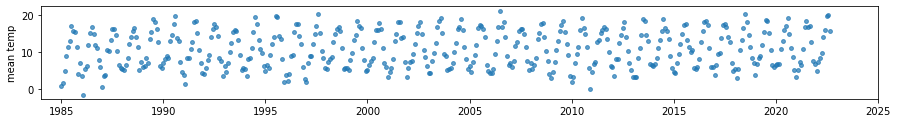

In [2]:
# Load the dataset
url = 'https://www.cl.cam.ac.uk/teaching/2223/DataSci/data/climate.csv'
climate = pandas.read_csv(url)
climate = climate.loc[(climate.station=='Cambridge') & (climate.yyyy>=1985)].copy()
t = climate.yyyy + (climate.mm-1)/12
temp = (climate.tmin + climate.tmax)/2

fig,ax = plt.subplots(figsize=(15,1.7))
ax.scatter(t, temp, s=15, alpha=0.7)
ax.set_xlim([1984, 2025])
ax.set_ylabel('mean temp')
plt.show()

* **Step 0.** Write out the likelihood function for the observed data, given all the unknown parameters. I suggest
the probabilistic model
$$
\texttt{temp} = \alpha + \beta_1 \sin(2\pi\texttt{t}) + \beta_2 \cos(2\pi\texttt{t}) + \gamma(\texttt{t}-2000) + N(0,\sigma^2).
$$
This is like the linear model from section 2.2 of the notes, but with an explicit probabilistic noise term in the style of section 2.4.

* **Step 1.** Invent a prior distribution for the unknown parameters. Take $m$ samples from your prior distribution, to create a list
of samples $[(\alpha_1,\beta1_1,\beta2_1,\gamma_1),\dots,(\alpha_m,\beta1_m,\beta2_m,\gamma_m)]$. I'll assume you know $\sigma$; if you are uncertain about $\sigma$ then you should include it in the unknown parameters.

* **Step 2.** Define a weight $w_i$ for each sample $(\alpha_i,\beta1_i,\beta2_i,\gamma_i)$, equal to the likelihood function for the observed data. Then rescale your weights so they sum to one.

* **Step 3.** Plot a posterior histogram for γ, and then find a confidence interval for it.

In [97]:
# Step 0.
# Define a function logpr(temp, α,β1,β2,γ) which returns the log likelihood of the observed data temp.
# Use the probability model in the equation above. Just pluck a value for σ out of thin air.
# Also, use scipy.stats.norm.logpdf, rather than typing out the formula yourself.

def logpr(temp, α,β1,β2,γ):
    # temp is a vector, the parameters are scalars, and the function must return a scalar
    t = climate['t']
    return ???

In [93]:
# Step 1.
# Instead of creating a list of 4-tuples, let's create 4 lists of values.

m = 20000
α_ = ???
β1_ = ???
β2_ = ???
γ_ = ???

In [98]:
# Step 2.
# This code uses a trick to avoid underflow. See section 7.3 of notes.

logw = np.array([logpr(climate['temp'], α,β1,β2,γ) for (α,β1,β2,γ) in zip(α_,β1_,β2_,γ_)])
logw = logw - max(logw)
w = np.exp(logw)
w = w / np.sum(w)

In [ ]:
# Step 3.

# Plot a histogram of the posterior density.
fig,ax = plt.subplots()
ax.hist(γ_*100, weights=w, density=True, bins=np.linspace(0,8,60))

# Find a posterior 95% confidence interval using γ_ and w
# (see section 7.4 of notes)
lo,hi = ???,???

ax.axvline(x=lo*100, linestyle='--', color='black')
ax.axvline(x=hi*100, linestyle='--', color='black')
ax.set_title(f"Temperature increase ≈ [{lo*100:.3},{hi*100:.3}] °C/century")

plt.show()